In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, learning_curve
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    log_loss,
    roc_curve,
    auc,
)
from sklearn.preprocessing import LabelBinarizer
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Define the base directory for saving results
base_dir = "K_FOLD/DT/"
os.makedirs(base_dir, exist_ok=True)  # Create the directory if it doesn't exist

In [3]:
# Load dataset
df = pd.read_csv("features.csv")  # Replace with your actual file

In [4]:
# Separate features and labels
X = df.iloc[:, 2:].values  # Feature vectors
y = df.iloc[:, 1].values   # Labels (man/woman)

In [5]:
# Encode labels to binary (0 and 1)
label_encoder = LabelBinarizer()
y = label_encoder.fit_transform(y).ravel()

In [6]:
# Initialize KFold for 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [7]:
# Initialize lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []
train_losses = []
test_losses = []
fprs = []
tprs = []
auc_scores = []

In [9]:
# Function to plot learning curve
def plot_learning_curve(model, X, y, base_dir):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring="accuracy"
    )

    # Calculate mean and standard deviation for training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation Accuracy")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.title("Learning Curve for Decision Tree")
    plt.legend(loc="best")
    plt.grid()
    plt.savefig(os.path.join(base_dir, "learning_curve.png"))
    plt.close()


In [10]:
# Perform 5-fold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create and train the Decision Tree model
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Calculate precision, recall, and F1-score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Calculate training loss (log loss)
    train_loss = log_loss(y_train, model.predict_proba(X_train))
    train_losses.append(train_loss)

    # Calculate test loss (log loss)
    test_loss = log_loss(y_test, y_pred_proba)
    test_losses.append(test_loss)

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    fprs.append(fpr)
    tprs.append(tpr)
    auc_scores.append(roc_auc)

    # Print results for each fold
    print(f"Fold {fold} Results:")
    print(f"Test Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Training Loss: {train_loss:.4f}")
    print(f"Test Loss: {test_loss:.4f}")
    print(f"AUC: {roc_auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    print("-" * 50)

    # Save classification report for this fold to a text file
    with open(os.path.join(base_dir, f"fold_{fold}_classification_report.txt"), "w") as f:
        f.write(f"Fold {fold} Results:\n")
        f.write(f"Test Accuracy: {accuracy:.2f}\n")
        f.write(f"Precision: {precision:.4f}\n")
        f.write(f"Recall: {recall:.4f}\n")
        f.write(f"F1-Score: {f1:.4f}\n")
        f.write(f"Training Loss: {train_loss:.4f}\n")
        f.write(f"Test Loss: {test_loss:.4f}\n")
        f.write(f"AUC: {roc_auc:.4f}\n")
        f.write("Classification Report:\n")
        f.write(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
        f.write("-" * 50 + "\n")

Fold 1 Results:
Test Accuracy: 0.77
Precision: 0.7727
Recall: 0.7688
F1-Score: 0.7708
Training Loss: 0.0000
Test Loss: 8.1795
AUC: 0.7730
Classification Report:
              precision    recall  f1-score   support

         man       0.77      0.78      0.78       202
       women       0.77      0.77      0.77       199

    accuracy                           0.77       401
   macro avg       0.77      0.77      0.77       401
weighted avg       0.77      0.77      0.77       401

--------------------------------------------------
Fold 2 Results:
Test Accuracy: 0.76
Precision: 0.7487
Recall: 0.7563
F1-Score: 0.7525
Training Loss: 0.0000
Test Loss: 8.8087
AUC: 0.7556
Classification Report:
              precision    recall  f1-score   support

         man       0.76      0.75      0.76       204
       women       0.75      0.76      0.75       197

    accuracy                           0.76       401
   macro avg       0.76      0.76      0.76       401
weighted avg       0.76     

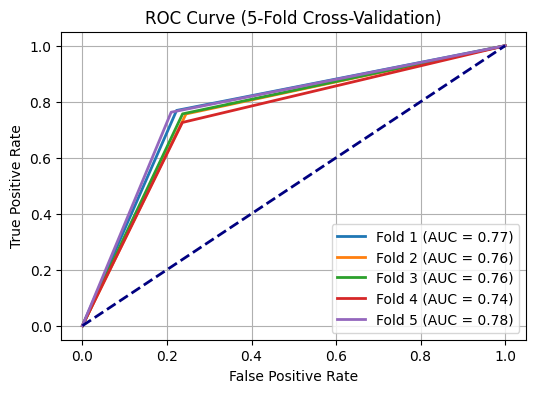

In [14]:
# Plot ROC Curve
plt.figure(figsize=(6, 4))
for i in range(5):
    plt.plot(fprs[i], tprs[i], lw=2, label=f"Fold {i+1} (AUC = {auc_scores[i]:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (5-Fold Cross-Validation)")
plt.legend(loc="lower right")
plt.grid()
plt.savefig(os.path.join(base_dir, "roc_curve.png"))
plt.show()
plt.close()

In [15]:
# Plot Learning Curve
plot_learning_curve(DecisionTreeClassifier(random_state=42), X, y, base_dir)

In [16]:
# Calculate average metrics across all folds
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)
avg_train_loss = np.mean(train_losses)
avg_test_loss = np.mean(test_losses)
avg_auc = np.mean(auc_scores)

In [17]:
# Save results to a text file
with open(os.path.join(base_dir, "K_FOLD_DT_results.txt"), "w") as f:
    f.write("Average Results Across 5 Folds:\n")
    f.write(f"Average Test Accuracy: {avg_accuracy:.2f}\n")
    f.write(f"Average Precision: {avg_precision:.4f}\n")
    f.write(f"Average Recall: {avg_recall:.4f}\n")
    f.write(f"Average F1-Score: {avg_f1:.4f}\n")
    f.write(f"Average Training Loss: {avg_train_loss:.4f}\n")
    f.write(f"Average Test Loss: {avg_test_loss:.4f}\n")
    f.write(f"Average AUC: {avg_auc:.4f}\n")